In [2]:
import cv2 as cv
traindataset='C:/Users/acer/Desktop/tracks/Train track.v2-traintrack_2021-11-12-9-11am.yolov8-obb/datasets/datasets/train/images'
testdataset='C:/Users/acer/Desktop/tracks/Train track.v2-traintrack_2021-11-12-9-11am.yolov8-obb/datasets/datasets/test/images'
validdataset='C:/Users/acer/Desktop/tracks/Train track.v2-traintrack_2021-11-12-9-11am.yolov8-obb/datasets/datasets/val/images'


Training Data


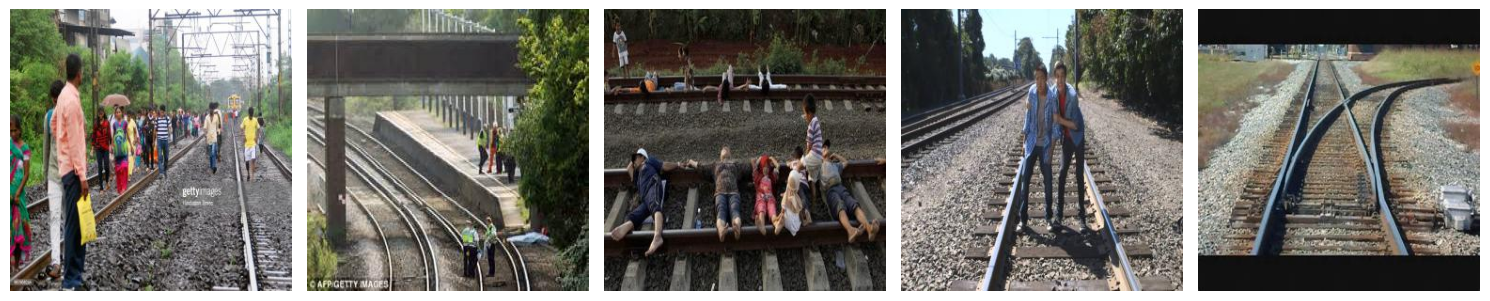

Testing Data


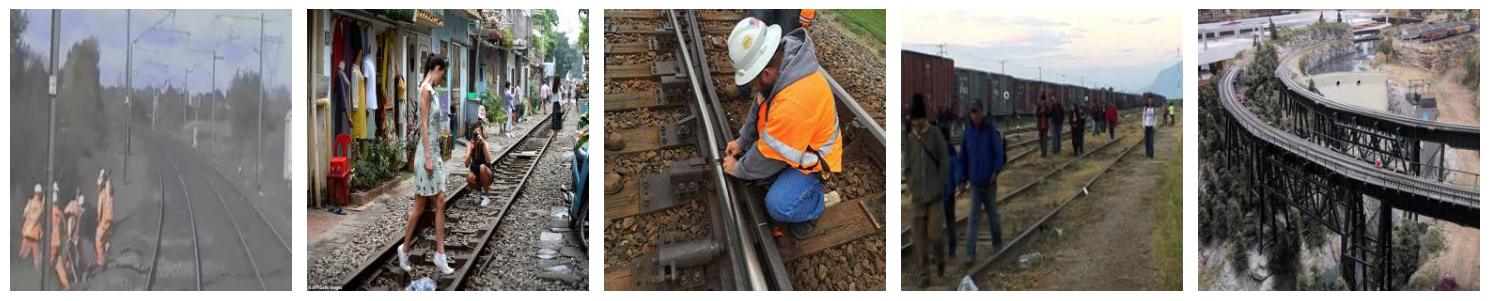

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def pick_random_images(folder_path, num_images):
    # Get list of files in the folder
    files = os.listdir(folder_path)
    
    # Filter out non-image files
    image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
    
    # Pick num_images random images
    random_images = random.sample(image_files, num_images)
    
    return random_images

def plot_images(folder_path, image_names):
    num_images = len(image_names)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i, image_name in enumerate(image_names):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

folder_path = "path_to_your_folder"  # Change this to the path of your folder
num_images = 5
print("Training Data")
randomtrain_images = pick_random_images(traindataset, num_images)
plot_images(traindataset, randomtrain_images)
print("Testing Data")
randomtest_images=pick_random_images(testdataset,num_images)
plot_images(testdataset,randomtest_images)


In [4]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')


In [5]:
pred=model.predict(source="C:/Users/acer/Desktop/tracks/nn.mp4",stream=True,show=True)
for i in pred:
    print(i)


video 1/1 (frame 1/366) C:\Users\acer\Desktop\tracks\nn.mp4: 352x640 12 persons, 1 train, 62.4ms
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 

In [6]:
model.export(format='openvino')


Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.2.1+cpu CPU (13th Gen Intel Core(TM) i9-13900HX)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

OpenVINO: starting export with openvino 2024.0.0-14509-34caeefd078-releases/2024/0...
OpenVINO: export success ✅ 87.3s, saved as 'yolov8n_openvino_model\' (12.3 MB)

Export complete (89.7s)
Results saved to C:\Users\acer\Desktop\dvhackathon
Predict:         yolo predict task=detect model=yolov8n_openvino_model imgsz=640  
Validate:        yolo val task=detect model=yolov8n_openvino_model imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n_openvino_model'

In [7]:
ov_model = YOLO('C:/Users/acer/Desktop/hackathon/yolov8n_openvino_model',task="detect")
result=ov_model(source="C:/Users/acer/Desktop/tracks/nn.mp4",stream=True)
for r in result:
    print(r)

Loading C:\Users\acer\Desktop\hackathon\yolov8n_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

video 1/1 (frame 1/366) C:\Users\acer\Desktop\tracks\nn.mp4: 640x640 16 persons, 1 train, 1 handbag, 70.5ms
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine gla

: 

Speed: 1.5ms preprocess, 59.1ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
